## E7. Visualización de datos de agua

### Carga de datos desde fichero CSV
La carga de datos en pandas es una de las tareas más comunes y puede realizarse utilizando la función pd.read_csv() para archivos CSV.

In [47]:
import pandas as pd
import numpy as np

# Carga de datos de Agua
agua_df = pd.read_csv('data/m1_e7_datos_agua_dia.csv', index_col=0)
print(agua_df.head())

               Consumo
Fecha                 
2024-01-01  695.242005
2024-01-02  552.235756
2024-01-03  667.603976
2024-01-04  573.564748
2024-01-05  670.054368


### Gráfico de Barras:
Los gráficos de barras se utilizan principalmente para comparar cantidades entre diferentes categorías o grupos.

#### Características principales:
- **Comparación de categorías**: Son ideales para mostrar comparaciones directas entre diferentes grupos o categorías. Cada barra representa una categoría, y la altura o longitud de la barra indica la cantidad asociada a esa categoría.
- **Visualización discreta**: Se utilizan mejor para datos discretos (por ejemplo, ventas por producto, población por país, etc.).
- **Claridad en diferencias**: Ayuda a visualizar diferencias entre categorías que no están relacionadas de forma secuencial.

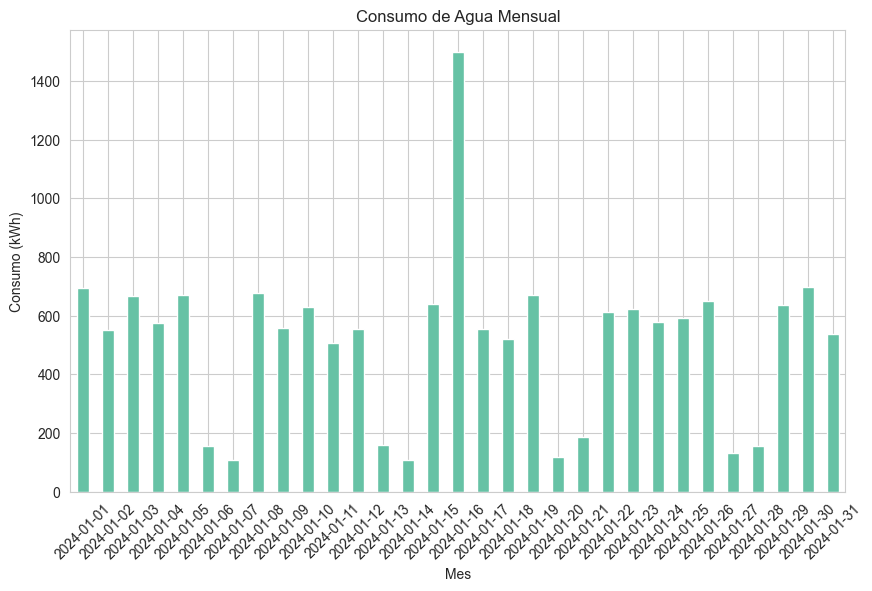

In [ ]:
import matplotlib.pyplot as plt

# Seleccionamos una porción del dataset
plot_df = agua_df[:31]

plt.figure(figsize=(10, 6))
plot_df['Consumo'].plot(kind='bar')
plt.title('Consumo de Agua Mensual')
plt.xlabel('Mes')
plt.ylabel('Consumo (Litros)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.show()

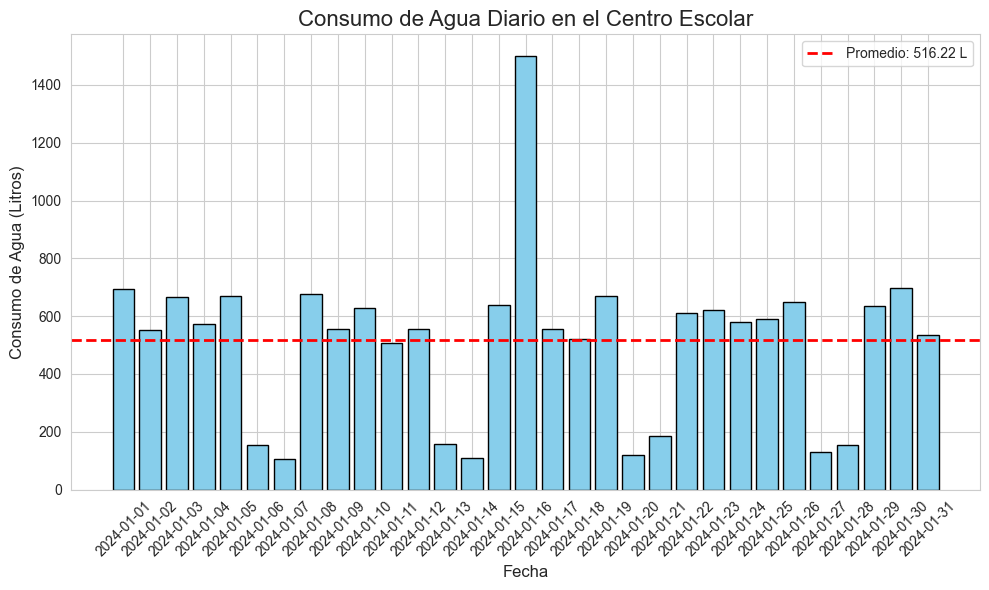

In [67]:
# Calcular el promedio de la columna 'Consumo_Agua_Litros'
mean_consumo = plot_df['Consumo'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(plot_df.index, plot_df['Consumo'], color='skyblue', edgecolor='black')

# Añadir una línea horizontal que indique el promedio
plt.axhline(y=mean_consumo, color='red', linestyle='--', linewidth=2, label=f'Promedio: {mean_consumo:.2f} L')

# Añadir etiquetas y título
plt.title('Consumo de Agua Diario en el Centro Escolar', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Consumo de Agua (Litros)', fontsize=12)
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Gráfico de Líneas
Los gráficos de líneas son útiles para visualizar la evolución de una variable a lo largo del tiempo o para mostrar la relación entre datos secuenciales.

#### Características principales:
- **Tendencias a lo largo del tiempo**: Se utilizan principalmente para mostrar cómo cambian las variables continuas a lo largo del tiempo o en secuencias ordenadas. Es ideal para series temporales.
- **Continuidad**: Conectan puntos de datos con líneas, lo que ayuda a resaltar las tendencias o patrones en datos continuos.
- **Diferencias sutiles**: Las líneas permiten visualizar pequeños cambios o variaciones entre los puntos de datos.

<Figure size 1000x600 with 0 Axes>

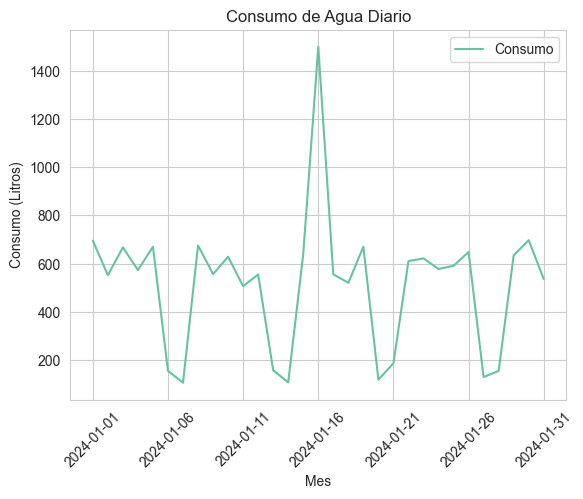

In [72]:
plt.figure(figsize=(10, 6))
plot_df[['Consumo']].plot()
plt.title('Consumo de Agua Diario')
plt.xlabel('Mes')
plt.ylabel('Consumo (Litros)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.show()

El gráfico de líneas para un con junto de datos tan pequeño hace más dificil apreciar las diferencias. SIn emabrgo, si mostramos un rango más largo

<Figure size 1000x600 with 0 Axes>

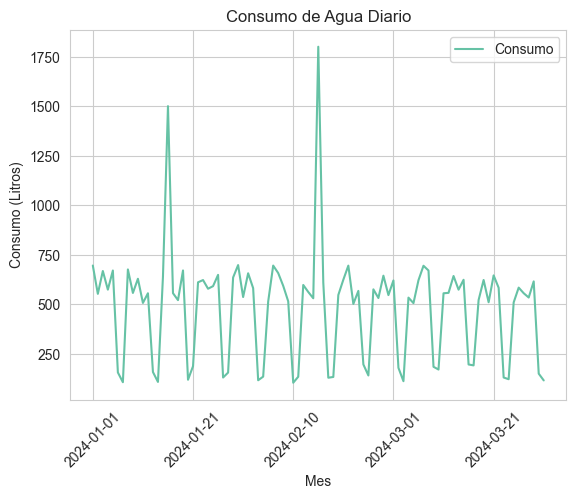

In [73]:
plt.figure(figsize=(10, 6))
agua_df[['Consumo']].plot()
plt.title('Consumo de Agua Diario')
plt.xlabel('Mes')
plt.ylabel('Consumo (Litros)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.show()

Y ahora dando un poco de estilo al gráfico

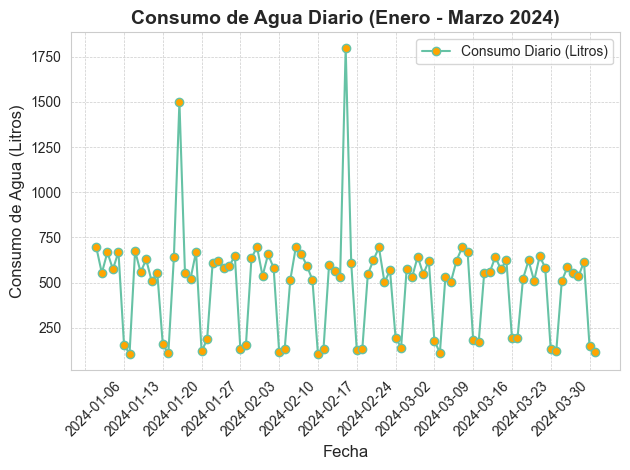

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Dibujar la línea con un estilo más estilizado
plt.plot(agua_df.index, agua_df['Consumo'], linestyle='-', marker='o', markersize=6, 
         markerfacecolor='orange', label='Consumo Diario (Litros)')

# Mejorar la visualización de los ejes
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Mostrar una marca por semana
plt.xticks(rotation=45, ha='right')  # Rotar las fechas en el eje X

# Añadir etiquetas y título
plt.title('Consumo de Agua Diario (Enero - Marzo 2024)', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Consumo de Agua (Litros)', fontsize=12)

# Añadir una cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Añadir leyenda
plt.legend()

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Por el contrario, un gráfico de barras en un conjunto grande de datos se hace demasiado denso, confuso.

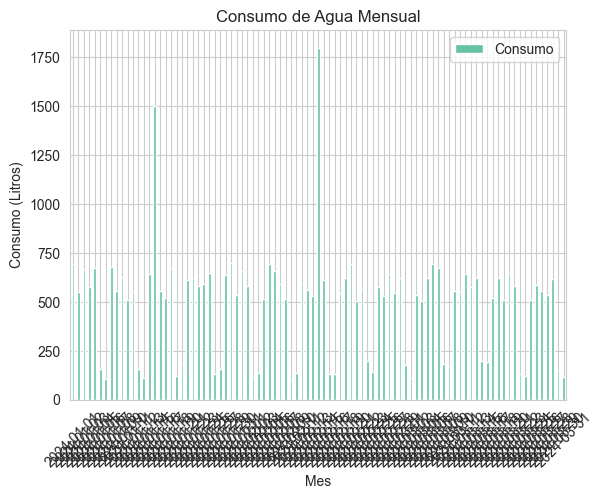

In [76]:
agua_df[['Consumo']].plot(kind='bar')
plt.title('Consumo de Agua Mensual')
plt.xlabel('Mes')
plt.ylabel('Consumo (Litros)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.show()

### Histograma
Un histograma es un tipo de gráfico que muestra la distribución de frecuencias de un conjunto de datos numéricos. Representa cómo se distribuyen los valores de una variable continua o cuantitativa en diferentes rangos o "bins" (intervalos), lo que permite visualizar la forma de la distribución, como si fuera un resumen visual de los datos.

Text(0, 0.5, 'Frecuencia')

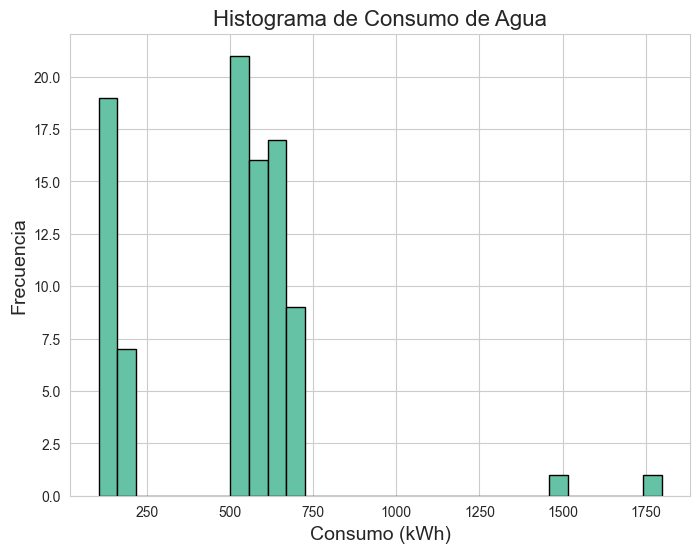

In [ ]:
# Crear el histograma de la columna 'Consumo'
plt.figure(figsize=(8, 6))
plt.hist(agua_df['Consumo'], bins=30, edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de Consumo de Agua', fontsize=16)
plt.xlabel('Consumo (Litros)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

Ahora vamos a generar algunas series complementarias a partir de la fecha de cada registro

In [79]:
# Generamos una columna con un objeto fecha a partir del índice
agua_df['Datetime'] = pd.to_datetime(agua_df.index)

# Crear nuevas columnas para el mes y el año
agua_df['Día'] = agua_df['Datetime'].dt.day  # Extraer el día
agua_df['Mes'] = agua_df['Datetime'].dt.month  # Extraer el mes
agua_df['Año'] = agua_df['Datetime'].dt.year   # Extraer el año

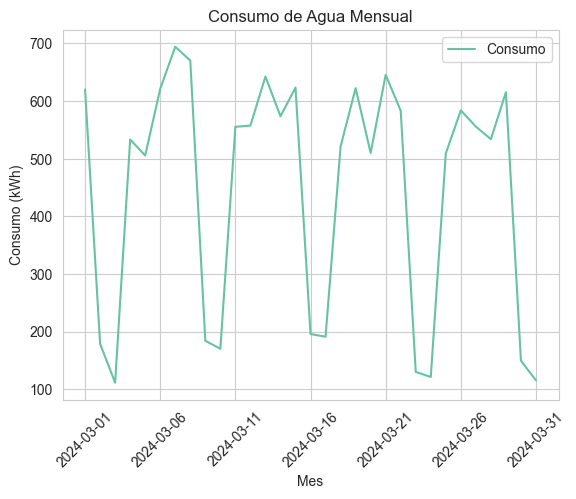

In [ ]:
# Filtramos por mes y solo nos quedamos con los datos del mes de Marzo
febrero_df = agua_df[agua_df['Mes'] == 3]
febrero_df[['Consumo']].plot()
plt.title('Consumo de Agua Mensual')
plt.xlabel('Mes')
plt.ylabel('Consumo (Litros)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.show()

Text(0, 0.5, 'Frecuencia')

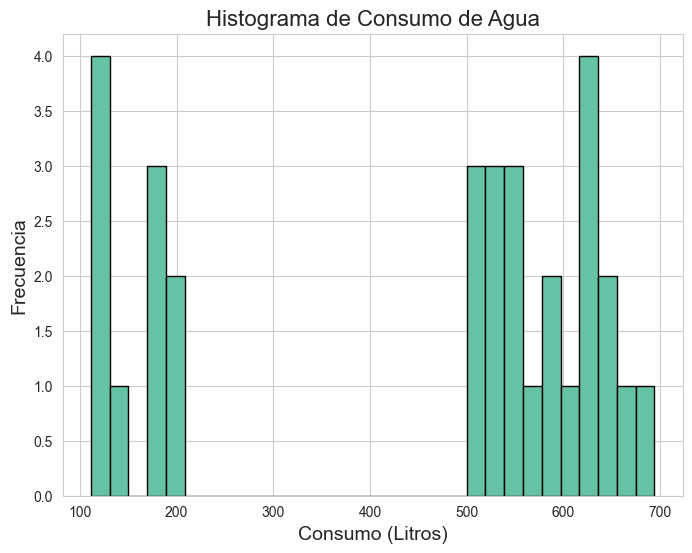

In [82]:
# Crear el histograma de la columna 'Consumo'
plt.figure(figsize=(8, 6))
plt.hist(febrero_df['Consumo'], bins=30, edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de Consumo de Agua', fontsize=16)
plt.xlabel('Consumo (Litros)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

### Visualización con `seaborn`

Primero representamos el conjunto de datos una visualiación en matpolotlib

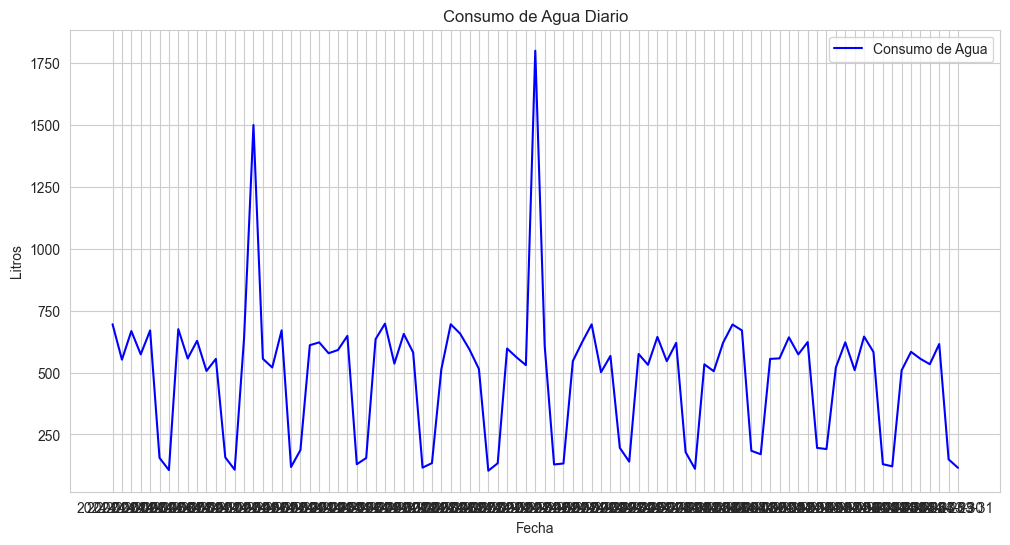

In [83]:
# Visualización con matplotlib
plt.figure(figsize=(12, 6))
plt.plot(agua_df.index, agua_df['Consumo'], label='Consumo de Agua', color='blue')
plt.title('Consumo de Agua Diario')
plt.xlabel('Fecha')
plt.ylabel('Litros')
plt.grid(True)
plt.legend()
plt.show()

Ahora usaremos seaborn par mejora la visualización, reduciendo ruido y resaltando los detalles

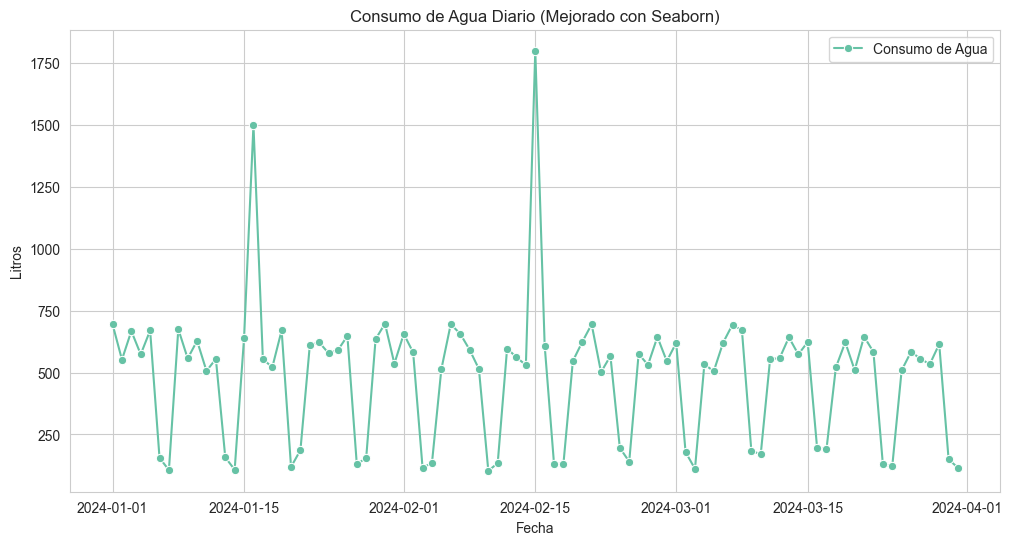

In [84]:
import seaborn as sns

# Visualización mejorada con seaborn
sns.set_style('whitegrid')
# Paleta de color
sns.set_palette("Set2")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Datetime",y='Consumo', data=agua_df, label='Consumo de Agua', marker='o')
plt.title('Consumo de Agua Diario (Mejorado con Seaborn)')
plt.xlabel('Fecha')
plt.ylabel('Litros')
plt.legend()
plt.show()

### Represntación de multiples series
Ahora vamos a cargar un nuevo conjunto de datos que contiene consumos para 3 edificios diferentes

       Fecha    Edificio  Consumo
0 2024-01-01  Edificio A     1028
1 2024-01-01  Edificio B      611
2 2024-01-01  Edificio C      361
3 2024-01-02  Edificio A      814
4 2024-01-02  Edificio B     1017
Edificio
Edificio A    60
Edificio B    60
Edificio C    60
Name: count, dtype: int64


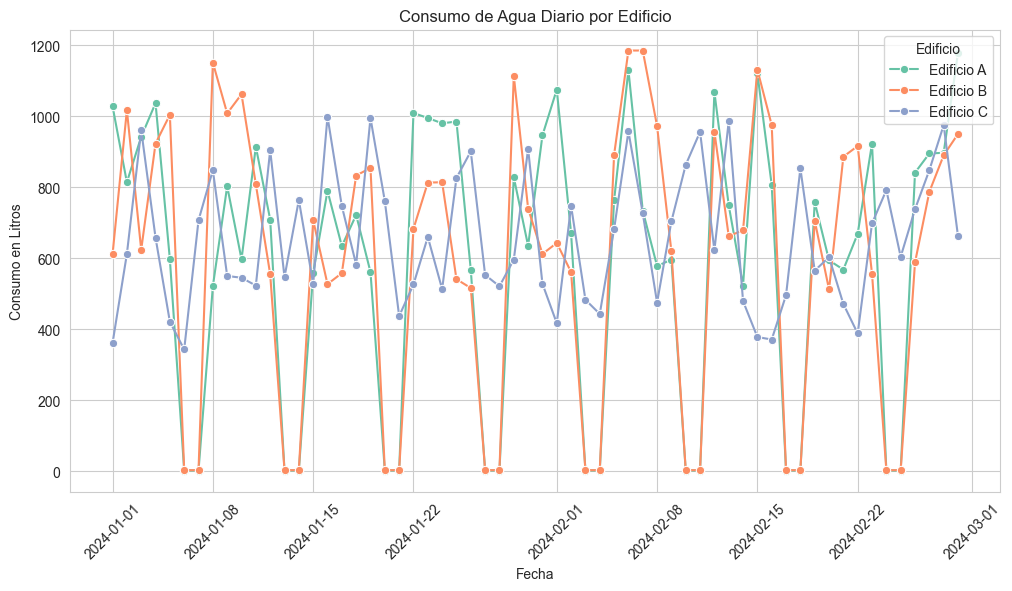

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('data/m1_e7_datos_agua_dia_edificios.csv', parse_dates=['Fecha'])
df = df[df['Fecha'].dt.month < 3]

# Exploración inicial del dataset
print(df.head())
print(df['Edificio'].value_counts())

# Configurar estilo de seaborn
sns.set_style('whitegrid')
# Paleta de color
sns.set_palette("Set2")

# Visualización con hue para diferenciar por edificio
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Fecha',
    y='Consumo',
    hue='Edificio',  # Diferenciar por el edificio usando `hue`
    data=df,
    marker='o'
)

# Personalización del gráfico
plt.title('Consumo de Agua Diario por Edificio')
plt.xlabel('Fecha')
plt.ylabel('Consumo en Litros')
plt.legend(title='Edificio')
plt.xticks(rotation=45)
plt.show()


Ahora representaremos todas los valores de las seires sin discrimnar por edificio. La ´line representa el valor promedio y y la banda más los valores extremos (mínimo y maximo) en cada día.

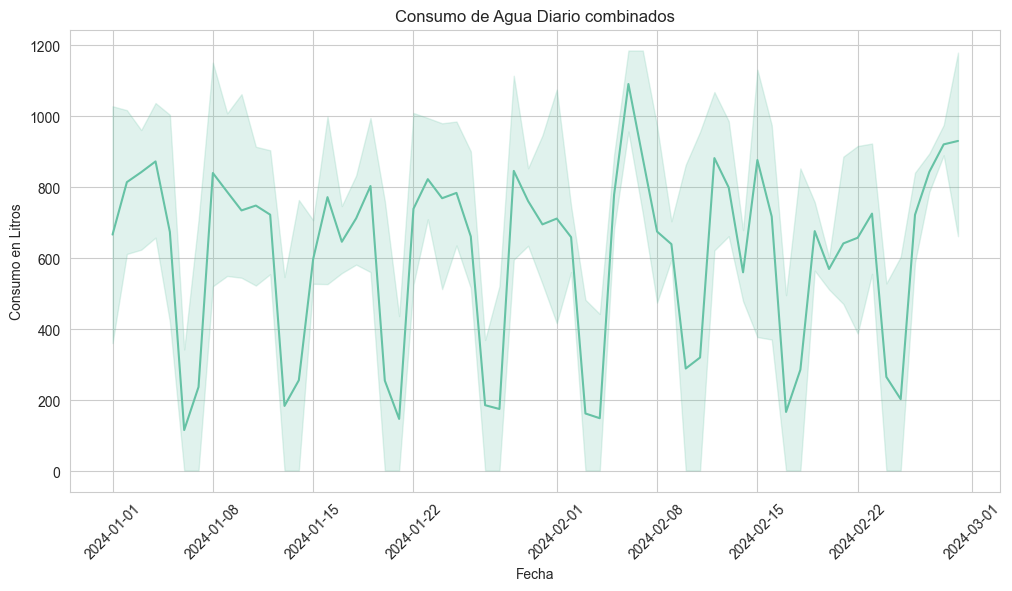

In [87]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Fecha", y="Consumo")
plt.title('Consumo de Agua Diario combinados')
plt.xlabel('Fecha')
plt.ylabel('Consumo en Litros')
plt.xticks(rotation=45)
plt.show()

Para conocer la distribución de los valores para cada edificio, haremos un histograma combinado de los 3 edificios

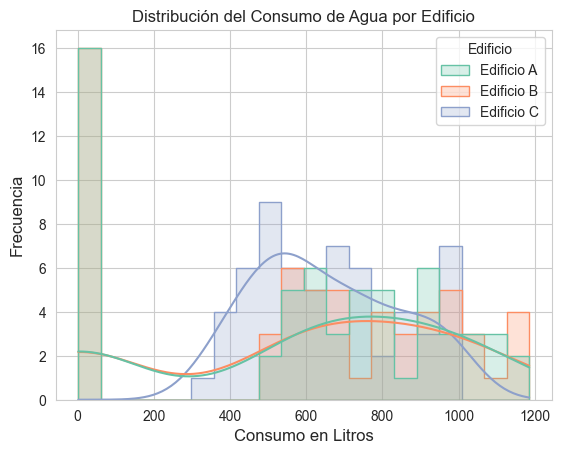

In [88]:
hist_plot = sns.histplot(data=df, 
                         x='Consumo', 
                         bins=20, 
                         kde=True, 
                         hue="Edificio", 
                         element='step')

plt.title('Distribución del Consumo de Agua por Edificio', fontsize=12)
plt.xlabel('Consumo en Litros', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.show()

Vamos a representar la relación entre consumos por pares de edificios

In [89]:
# Transformar el DataFrame utilizando pivot para fenrar una columna nueva por edificio
pivot_df = df.pivot(index='Fecha', columns='Edificio', values='Consumo')
pivot_df.head()

Edificio,Edificio A,Edificio B,Edificio C
Fecha,,,
2024-01-01,1028,611,361
2024-01-02,814,1017,612
2024-01-03,942,624,961
2024-01-04,1037,923,658
2024-01-05,597,1004,421


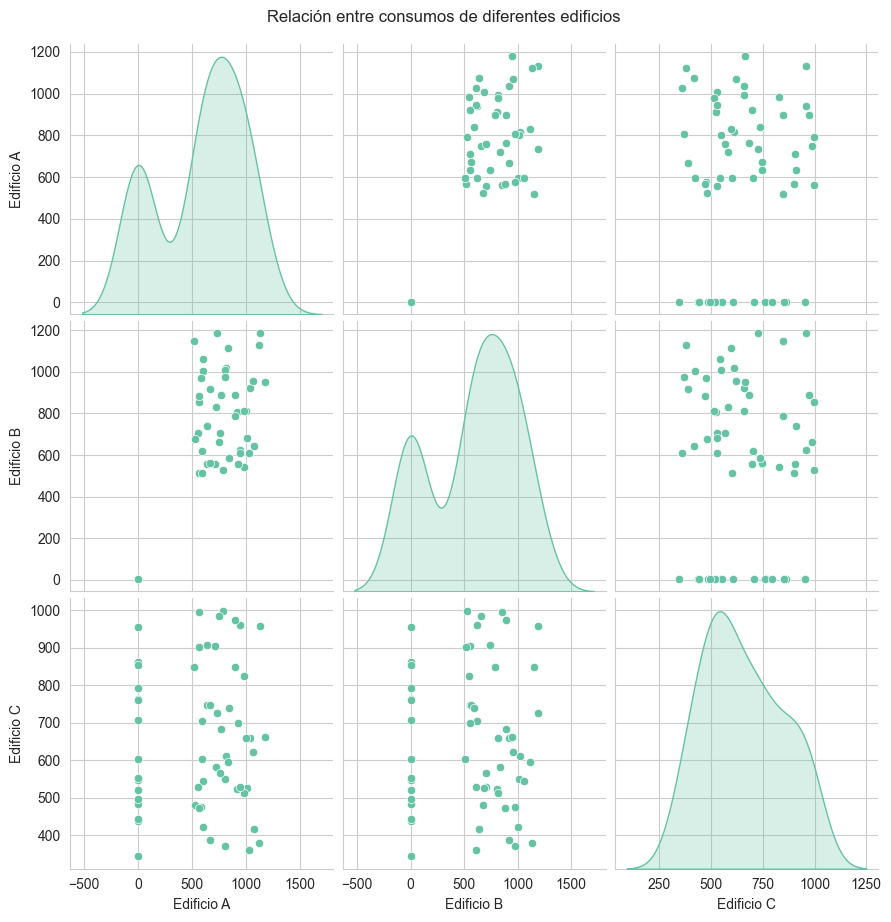

In [90]:
# Generar el scatterplot entre pares de consumos
sns.pairplot(pivot_df[['Edificio A', 'Edificio B', 'Edificio C']], diag_kind='kde', height=3, markers='o')

# Configurar el título
plt.suptitle('Relación entre consumos de diferentes edificios', y=1.02)
plt.show()

Ahora vamos a ver el mapa de correlaciones entre estas series y 2 nuevas series con el día de la semana y el mes del año

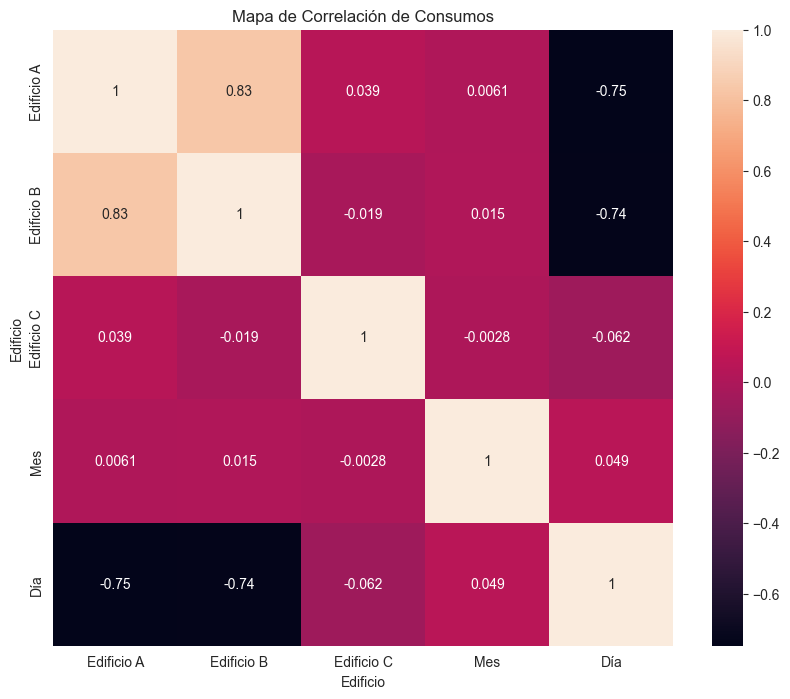

In [91]:
# Añadir las columnas de Mes y Día de la semana
pivot_df['Mes'] = pivot_df.index.month
pivot_df['Día'] = pivot_df.index.day_of_week

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df.corr(), annot=True)

# Configurar el título del gráfico
plt.title('Mapa de Correlación de Consumos')
plt.show()